In [2]:
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv('./dataset_0327_수정.csv',encoding='cp949')
df=df.iloc[:,1:]
df

,고객번호,성별,연령대,거주지역,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,총구매금액,구매빈도,최근구매일,...,문구류CV_S,가구류CV_S,레저취미CV_S,전자제품CV_S,도서음반CV_S,차량용품CV_S,분기증감율,분기변동율,객단가변동률,분기증감확인
0,1,2.156039,1.998229,0.525710,3.784157,-0.652472,-0.424659,0.769445,-0.486475,1.167623,...,-1.323632,0.736138,0.279975,0.588740,-0.624613,-0.783590,0.438791,-1.388013,0.075893,0
1,2,2.156039,1.998229,-0.760177,1.828781,-0.652472,-0.424659,1.032366,-0.460644,-0.267878,...,-1.323632,-0.123062,-1.159604,-0.158214,-0.624613,-0.783590,0.000000,-0.690965,0.705120,0
2,3,2.156039,1.998229,-0.760177,-0.405935,-0.652472,-0.424659,-0.501822,-0.315702,1.167623,...,-1.323632,-1.625508,-1.815644,1.170227,-0.624613,-0.783590,0.000000,-1.620363,-1.497173,0
3,4,-0.463814,1.998229,0.525710,0.432083,-0.652472,-0.424659,-0.286751,-0.710346,-0.472949,...,-1.323632,0.088640,0.268642,-1.264607,-0.624613,-0.783590,-0.877582,0.703133,0.075893,0
4,6,-0.463814,1.998229,3.097486,-0.405935,-0.652472,-0.424659,-0.166226,0.080377,-0.472949,...,1.633736,0.731873,1.163341,-1.264607,-0.624613,-0.783590,-0.877582,-1.155664,-0.238720,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,-0.463814,-2.144017,-0.760177,-0.405935,1.068660,-0.084953,-0.478128,-0.838067,-0.062806,...,0.585925,-1.625508,1.588049,-1.264607,-0.624613,-0.783590,0.000000,-1.155664,0.705120,0
18862,19334,2.156039,-1.108456,3.097486,7.974248,1.068660,-0.424659,-0.357708,0.858184,5.884266,...,-0.084726,0.181109,-0.557044,1.170227,0.637271,1.621021,0.438791,0.935482,1.334347,0
18863,19335,-0.463814,-1.108456,-0.760177,-0.405935,1.068660,-0.424659,-0.288700,0.466410,-0.472949,...,-0.945261,-0.684492,-0.032609,-1.264607,0.242607,0.707541,-0.877582,1.167832,0.075893,1
18864,19336,-0.463814,-1.108456,0.525710,-0.405935,-0.652472,-0.424659,-0.074066,-1.333165,0.552408,...,-1.323632,1.303824,-1.815644,-1.264607,-0.624613,-0.783590,-3.510330,0.703133,0.075893,1


In [9]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X

,성별,연령대,거주지역,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,총구매금액,구매빈도,최근구매일,A구매비율(%),...,화장품CV_S,문구류CV_S,가구류CV_S,레저취미CV_S,전자제품CV_S,도서음반CV_S,차량용품CV_S,분기증감율,분기변동율,객단가변동률
0,2.156039,1.998229,0.525710,3.784157,-0.652472,-0.424659,0.769445,-0.486475,1.167623,0.394618,...,-0.363105,-1.323632,0.736138,0.279975,0.588740,-0.624613,-0.783590,0.438791,-1.388013,0.075893
1,2.156039,1.998229,-0.760177,1.828781,-0.652472,-0.424659,1.032366,-0.460644,-0.267878,0.222038,...,-1.006358,-1.323632,-0.123062,-1.159604,-0.158214,-0.624613,-0.783590,0.000000,-0.690965,0.705120
2,2.156039,1.998229,-0.760177,-0.405935,-0.652472,-0.424659,-0.501822,-0.315702,1.167623,0.874281,...,-1.692524,-1.323632,-1.625508,-1.815644,1.170227,-0.624613,-0.783590,0.000000,-1.620363,-1.497173
3,-0.463814,1.998229,0.525710,0.432083,-0.652472,-0.424659,-0.286751,-0.710346,-0.472949,-0.849045,...,0.206798,-1.323632,0.088640,0.268642,-1.264607,-0.624613,-0.783590,-0.877582,0.703133,0.075893
4,-0.463814,1.998229,3.097486,-0.405935,-0.652472,-0.424659,-0.166226,0.080377,-0.472949,-0.312020,...,-0.852221,1.633736,0.731873,1.163341,-1.264607,-0.624613,-0.783590,-0.877582,-1.155664,-0.238720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,-0.463814,-2.144017,-0.760177,-0.405935,1.068660,-0.084953,-0.478128,-0.838067,-0.062806,-2.409681,...,-1.692524,0.585925,-1.625508,1.588049,-1.264607,-0.624613,-0.783590,0.000000,-1.155664,0.705120
18862,2.156039,-1.108456,3.097486,7.974248,1.068660,-0.424659,-0.357708,0.858184,5.884266,0.939555,...,0.258188,-0.084726,0.181109,-0.557044,1.170227,0.637271,1.621021,0.438791,0.935482,1.334347
18863,-0.463814,-1.108456,-0.760177,-0.405935,1.068660,-0.424659,-0.288700,0.466410,-0.472949,0.754613,...,-0.157816,-0.945261,-0.684492,-0.032609,-1.264607,0.242607,0.707541,-0.877582,1.167832,0.075893
18864,-0.463814,-1.108456,0.525710,-0.405935,-0.652472,-0.424659,-0.074066,-1.333165,0.552408,-0.432677,...,-0.063757,-1.323632,1.303824,-1.815644,-1.264607,-0.624613,-0.783590,-3.510330,0.703133,0.075893


# 결정트리

In [53]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정트리 예측 정확도: {0:.4f}'.format(accuracy),'\n')

params = {'max_depth':[2,4,6,8]}
grid_cv = GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=3,verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터:',grid_cv.best_params_)

결정트리 예측 정확도: 0.6497 

Fitting 3 folds for each of 4 candidates, totalling 12 fits
GridSearchCV 최고 평균 정확도 수치:0.7336
GridSearchCV 최적 하이퍼파라미터: {'max_depth': 4}


# 랜덤포레스트

In [ ]:
rf_clf = RandomForestClassifier(random_state=156)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('랜덤포레스트 정확도: {0:.4f}'.format(accuracy),'\n')

params = {
    'n_estimators':[10,50,100],
    'max_depth' : [6,8,10,12],
    'min_samples_leaf' : [8,12,18],
    'min_samples_split' : [8,16,20]
}

rf_clf = RandomForestClassifier(random_state=156, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_train,y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

랜덤포레스트 정확도: 0.7501 



In [75]:
rf_clf = RandomForestClassifier(random_state=156)
rf_clf.fit(X_train,y_train)
i = rf_clf.feature_importances_
i

array([0.0035188 , 0.0107716 , 0.00694514, 0.01113058, 0.00559697,
       0.01429349, 0.04010848, 0.03877537, 0.01633848, 0.02760824,
       0.02860835, 0.02703192, 0.00888612, 0.0324564 , 0.02821077,
       0.01529903, 0.02843075, 0.04461924, 0.03198101, 0.01353769,
       0.02767196, 0.03537999, 0.04123211, 0.01712671, 0.0322416 ,
       0.03193   , 0.02986761, 0.02084745, 0.02105783, 0.02585006,
       0.01624398, 0.00839989, 0.01034762, 0.20872911, 0.02062723,
       0.01829844])

In [1]:
from sklearn.metrics import mean_squared_error

def plot_feature_importance(model):
    n_features = X_train.shape[1]
    fig, ax = plt.subplots(figsize=(20,20))
    ax.barh(np.arange(n_features), sorted(model.feature_importances_), align="center")
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Random Forest Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
rf_clf = RandomForestClassifier(random_state=156)
rf_clf.fit(X_train,y_train)
plot_feature_importance(rf_clf)

NameError: name 'plt' is not defined

In [81]:
import eli5 
from eli5.sklearn import PermutationImportance 
from sklearn.ensemble import RandomForestClassifier

#미리 사용할 알고리즘을 fit 해야한다
model = RandomForestClassifier().fit(X_train, y_train)

perm = PermutationImportance(model, scoring = "accuracy", random_state = 22).fit(X_train, y_train) 
eli5.show_weights(perm, top = 20, feature_names = X_train.columns.tolist())

Weight,Feature
0.3052 ± 0.0065,분기증감율
0.0259 ± 0.0016,편의품_CV_S
0.0191 ± 0.0010,구매빈도
0.0165 ± 0.0012,총구매금액
0.0154 ± 0.0010,생활잡화CV_S
0.0090 ± 0.0018,식료품CV_S
0.0075 ± 0.0009,편의품구매비율(%)
0.0050 ± 0.0009,기호품CV_S
0.0031 ± 0.0007,의류잡화CV_S
0.0018 ± 0.0001,선매품CV_S


# GBM

In [55]:
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train,y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy),'\n')

params = {
    'n_estimators':[100,500],
    'learning_rate':[0.05,0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid=params,cv=3,verbose=1)
grid_cv.fit(X_train,y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))


GBM 정확도: 0.7329 

Fitting 3 folds for each of 4 candidates, totalling 12 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.1, 'n_estimators': 100}
최고 예측 정확도: 0.7391


# XGBoost

In [56]:
xgb = XGBClassifier(n_estimators = 100, random_state = 156,verbose=False)
xgb.fit(X_train,y_train, early_stopping_rounds = 100, eval_set=evals, eval_metric='logloss', verbose=False)
pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, pred)

params = {'max_depth':[5,7]
    , 'min_child_weight':[1,3]
    , 'colsample_bytree':[0.5,0.75]}

gridcv = GridSearchCV(xgb, param_grid = params, cv = 3, verbose=False)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric = "auc",
          eval_set = [(X_train, y_train), (X_test, y_test)])



[02:01:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[02:01:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.61466	validation_1-auc:0.58682
[1]	validation_0-auc:0.66306	validation_1-auc:0.61734
[2]	validation_0-auc:0.66816	validation_1-auc:0.61662
[3]	va

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=156, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                      

In [57]:
print('XGBoost 정확도: {0:.4f}'.format(accuracy),'\n')
print('최적 하이퍼 파라미터:\n', gridcv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(gridcv.best_score_))

XGBoost 정확도: 0.7300 

최적 하이퍼 파라미터:
 {'colsample_bytree': 0.75, 'max_depth': 5, 'min_child_weight': 3}
최고 예측 정확도: 0.7397


[17:23:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

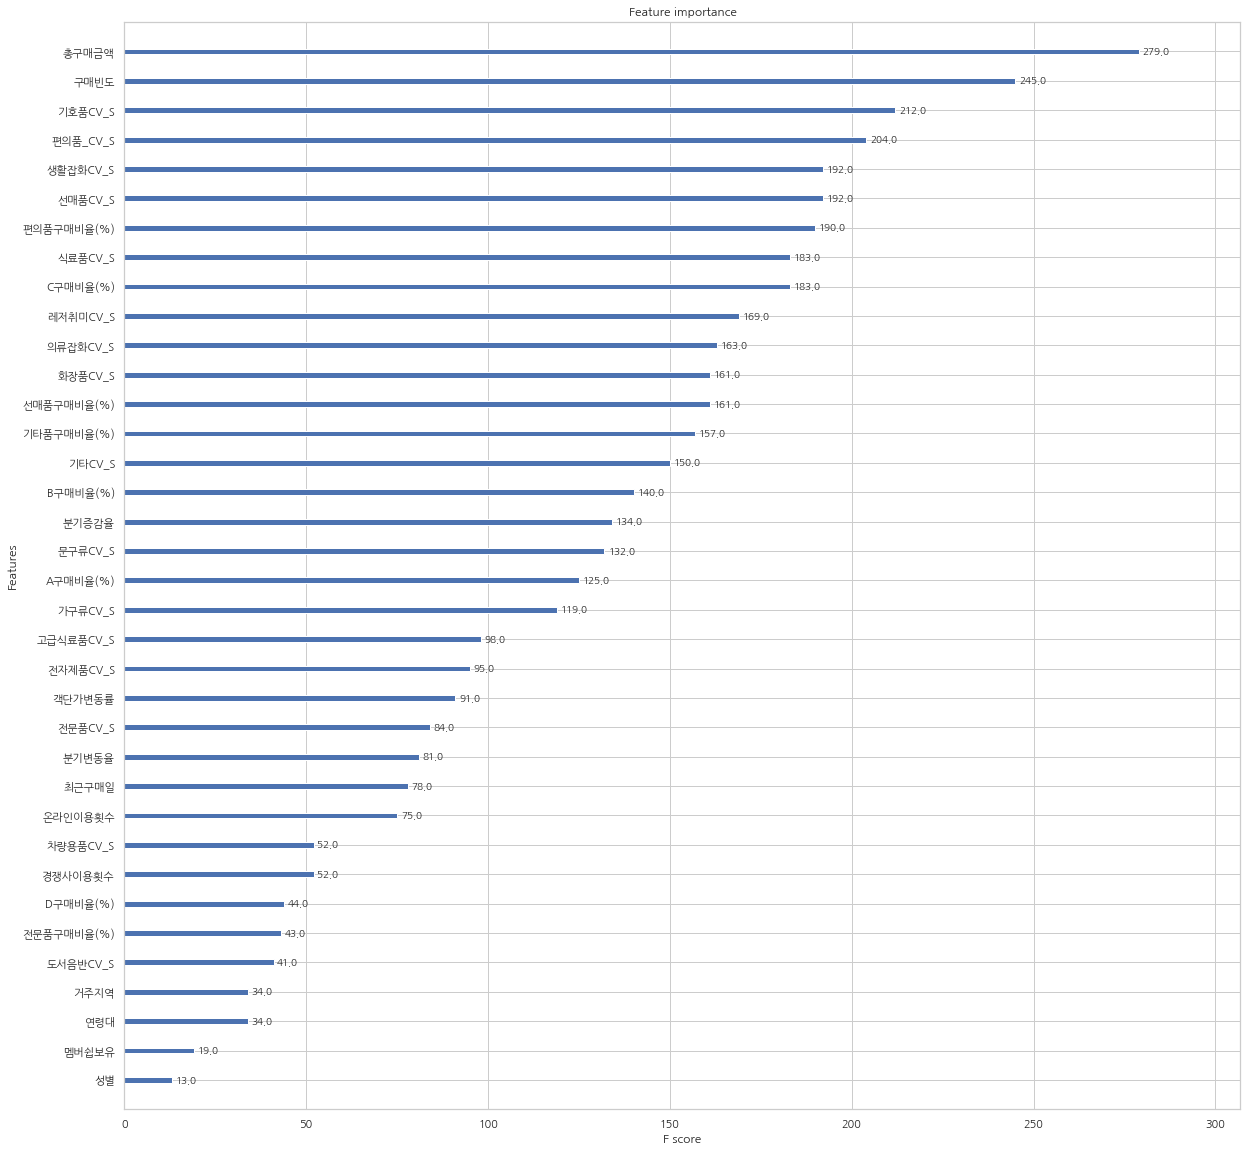

In [87]:
from xgboost import plot_importance
%matplotlib inline
xgb = XGBClassifier(n_estimators = 100, random_state = 156,verbose=False)
xgb.fit(X_train,y_train, early_stopping_rounds = 100, eval_set=evals, eval_metric='logloss', verbose=False)
fig, ax = plt.subplots(figsize=(20,20))
plot_importance(xgb, ax = ax)

In [88]:
import eli5 
from eli5.sklearn import PermutationImportance 
from sklearn.ensemble import RandomForestClassifier

#미리 사용할 알고리즘을 fit 해야한다
model = XGBClassifier(n_estimators = 100, random_state = 156,verbose=False).fit(X_train, y_train)
perm = PermutationImportance(model, scoring = "accuracy", random_state = 22).fit(X_train, y_train) 
eli5.show_weights(perm, top = 20, feature_names = X_train.columns.tolist())

[17:24:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:24:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Weight,Feature
0.2745 ± 0.0038,분기증감율
0.0696 ± 0.0029,총구매금액
0.0558 ± 0.0026,구매빈도
0.0392 ± 0.0014,편의품구매비율(%)
0.0333 ± 0.0014,식료품CV_S
0.0277 ± 0.0032,편의품_CV_S
0.0269 ± 0.0018,선매품CV_S
0.0243 ± 0.0015,기타품구매비율(%)
0.0237 ± 0.0020,기호품CV_S
0.0222 ± 0.0027,C구매비율(%)


# LightGBM

In [59]:
lgbm = LGBMClassifier(n_estimators=400)
evals = [(X_test,y_test)]
lgbm.fit(X_train, y_train, eval_set=evals, verbose=False)
pred = lgbm.predict(X_test)
accuracy = accuracy_score(y_test,pred)



params = {
    'max_depth':[128,160],
    'min_child_samples':[60,100],
    'subsample':[0.8,1]}

gridcv = GridSearchCV(lgbm, param_grid = params, cv = 3, verbose=False)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric = 'auc',
          eval_set = [(X_train, y_train), (X_test,y_test)])

lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1],average='macro')




[1]	valid_0's auc: 0.812845	valid_0's binary_logloss: 0.655907	valid_1's auc: 0.819584	valid_1's binary_logloss: 0.654427
[2]	valid_0's auc: 0.817334	valid_0's binary_logloss: 0.632294	valid_1's auc: 0.821587	valid_1's binary_logloss: 0.630134
[3]	valid_0's auc: 0.821868	valid_0's binary_logloss: 0.612543	valid_1's auc: 0.824651	valid_1's binary_logloss: 0.610189
[4]	valid_0's auc: 0.823298	valid_0's binary_logloss: 0.596134	valid_1's auc: 0.825834	valid_1's binary_logloss: 0.593443
[5]	valid_0's auc: 0.824808	valid_0's binary_logloss: 0.582111	valid_1's auc: 0.826986	valid_1's binary_logloss: 0.579272
[6]	valid_0's auc: 0.82579	valid_0's binary_logloss: 0.570251	valid_1's auc: 0.827289	valid_1's binary_logloss: 0.567451
[7]	valid_0's auc: 0.827847	valid_0's binary_logloss: 0.559861	valid_1's auc: 0.828647	valid_1's binary_logloss: 0.557163
[8]	valid_0's auc: 0.828889	valid_0's binary_logloss: 0.551043	valid_1's auc: 0.828811	valid_1's binary_logloss: 0.548574
[9]	valid_0's auc: 0.8297

[29]	valid_0's auc: 0.847995	valid_0's binary_logloss: 0.483754	valid_1's auc: 0.830683	valid_1's binary_logloss: 0.50011
[30]	valid_0's auc: 0.848977	valid_0's binary_logloss: 0.482275	valid_1's auc: 0.830662	valid_1's binary_logloss: 0.499728
[31]	valid_0's auc: 0.849722	valid_0's binary_logloss: 0.48091	valid_1's auc: 0.830919	valid_1's binary_logloss: 0.498988
[32]	valid_0's auc: 0.850701	valid_0's binary_logloss: 0.479406	valid_1's auc: 0.831	valid_1's binary_logloss: 0.498598
[33]	valid_0's auc: 0.851929	valid_0's binary_logloss: 0.477702	valid_1's auc: 0.831184	valid_1's binary_logloss: 0.498162
[34]	valid_0's auc: 0.852435	valid_0's binary_logloss: 0.476513	valid_1's auc: 0.830917	valid_1's binary_logloss: 0.498101
[35]	valid_0's auc: 0.853419	valid_0's binary_logloss: 0.475163	valid_1's auc: 0.830856	valid_1's binary_logloss: 0.498024
[36]	valid_0's auc: 0.854194	valid_0's binary_logloss: 0.473921	valid_1's auc: 0.831015	valid_1's binary_logloss: 0.497729
[37]	valid_0's auc: 0

[35]	valid_0's auc: 0.852277	valid_0's binary_logloss: 0.476508	valid_1's auc: 0.829903	valid_1's binary_logloss: 0.498734
[36]	valid_0's auc: 0.853015	valid_0's binary_logloss: 0.475322	valid_1's auc: 0.830116	valid_1's binary_logloss: 0.498396
[37]	valid_0's auc: 0.853866	valid_0's binary_logloss: 0.474034	valid_1's auc: 0.830386	valid_1's binary_logloss: 0.497912
[38]	valid_0's auc: 0.854826	valid_0's binary_logloss: 0.472754	valid_1's auc: 0.830369	valid_1's binary_logloss: 0.498001
[39]	valid_0's auc: 0.855347	valid_0's binary_logloss: 0.471803	valid_1's auc: 0.83036	valid_1's binary_logloss: 0.497771
[40]	valid_0's auc: 0.856426	valid_0's binary_logloss: 0.470444	valid_1's auc: 0.829904	valid_1's binary_logloss: 0.498189
[41]	valid_0's auc: 0.857425	valid_0's binary_logloss: 0.469201	valid_1's auc: 0.829886	valid_1's binary_logloss: 0.498125
[42]	valid_0's auc: 0.858316	valid_0's binary_logloss: 0.468064	valid_1's auc: 0.830039	valid_1's binary_logloss: 0.498055
[43]	valid_0's au

[1]	valid_0's auc: 0.812988	valid_0's binary_logloss: 0.656472	valid_1's auc: 0.817788	valid_1's binary_logloss: 0.654862
[2]	valid_0's auc: 0.817104	valid_0's binary_logloss: 0.633046	valid_1's auc: 0.821742	valid_1's binary_logloss: 0.630806
[3]	valid_0's auc: 0.818985	valid_0's binary_logloss: 0.61367	valid_1's auc: 0.823174	valid_1's binary_logloss: 0.611122
[4]	valid_0's auc: 0.821969	valid_0's binary_logloss: 0.597158	valid_1's auc: 0.824672	valid_1's binary_logloss: 0.59431
[5]	valid_0's auc: 0.824491	valid_0's binary_logloss: 0.583311	valid_1's auc: 0.825413	valid_1's binary_logloss: 0.580612
[6]	valid_0's auc: 0.825952	valid_0's binary_logloss: 0.5716	valid_1's auc: 0.826096	valid_1's binary_logloss: 0.568989
[7]	valid_0's auc: 0.827264	valid_0's binary_logloss: 0.561466	valid_1's auc: 0.826919	valid_1's binary_logloss: 0.559139
[8]	valid_0's auc: 0.828262	valid_0's binary_logloss: 0.552893	valid_1's auc: 0.827368	valid_1's binary_logloss: 0.5508
[9]	valid_0's auc: 0.829313	va

[6]	valid_0's auc: 0.824004	valid_0's binary_logloss: 0.571983	valid_1's auc: 0.825385	valid_1's binary_logloss: 0.569409
[7]	valid_0's auc: 0.824983	valid_0's binary_logloss: 0.562074	valid_1's auc: 0.826365	valid_1's binary_logloss: 0.559192
[8]	valid_0's auc: 0.826894	valid_0's binary_logloss: 0.553161	valid_1's auc: 0.827424	valid_1's binary_logloss: 0.550599
[9]	valid_0's auc: 0.827487	valid_0's binary_logloss: 0.545766	valid_1's auc: 0.827493	valid_1's binary_logloss: 0.543519
[10]	valid_0's auc: 0.828942	valid_0's binary_logloss: 0.539001	valid_1's auc: 0.828189	valid_1's binary_logloss: 0.537101
[11]	valid_0's auc: 0.829568	valid_0's binary_logloss: 0.533381	valid_1's auc: 0.828131	valid_1's binary_logloss: 0.53177
[12]	valid_0's auc: 0.830433	valid_0's binary_logloss: 0.52825	valid_1's auc: 0.828226	valid_1's binary_logloss: 0.527395
[13]	valid_0's auc: 0.831229	valid_0's binary_logloss: 0.523751	valid_1's auc: 0.828505	valid_1's binary_logloss: 0.523438
[14]	valid_0's auc: 0.

[29]	valid_0's auc: 0.846386	valid_0's binary_logloss: 0.48502	valid_1's auc: 0.832994	valid_1's binary_logloss: 0.497143
[30]	valid_0's auc: 0.847595	valid_0's binary_logloss: 0.483507	valid_1's auc: 0.832556	valid_1's binary_logloss: 0.497259
[31]	valid_0's auc: 0.848355	valid_0's binary_logloss: 0.482162	valid_1's auc: 0.832623	valid_1's binary_logloss: 0.496795
[32]	valid_0's auc: 0.849182	valid_0's binary_logloss: 0.480869	valid_1's auc: 0.832477	valid_1's binary_logloss: 0.496704
[33]	valid_0's auc: 0.84979	valid_0's binary_logloss: 0.47978	valid_1's auc: 0.832449	valid_1's binary_logloss: 0.496432
[34]	valid_0's auc: 0.850861	valid_0's binary_logloss: 0.478312	valid_1's auc: 0.832613	valid_1's binary_logloss: 0.496152
[35]	valid_0's auc: 0.851564	valid_0's binary_logloss: 0.477187	valid_1's auc: 0.832777	valid_1's binary_logloss: 0.495718
[36]	valid_0's auc: 0.852688	valid_0's binary_logloss: 0.475767	valid_1's auc: 0.832563	valid_1's binary_logloss: 0.495807
[37]	valid_0's auc:

[62]	valid_0's auc: 0.872654	valid_0's binary_logloss: 0.449357	valid_1's auc: 0.828318	valid_1's binary_logloss: 0.499397
[63]	valid_0's auc: 0.873461	valid_0's binary_logloss: 0.448426	valid_1's auc: 0.828526	valid_1's binary_logloss: 0.499125
[1]	valid_0's auc: 0.813185	valid_0's binary_logloss: 0.656418	valid_1's auc: 0.816047	valid_1's binary_logloss: 0.655334
[2]	valid_0's auc: 0.817256	valid_0's binary_logloss: 0.633008	valid_1's auc: 0.817447	valid_1's binary_logloss: 0.631528
[3]	valid_0's auc: 0.819631	valid_0's binary_logloss: 0.613678	valid_1's auc: 0.81994	valid_1's binary_logloss: 0.612006
[4]	valid_0's auc: 0.821069	valid_0's binary_logloss: 0.597651	valid_1's auc: 0.82282	valid_1's binary_logloss: 0.595139
[5]	valid_0's auc: 0.822878	valid_0's binary_logloss: 0.58373	valid_1's auc: 0.823784	valid_1's binary_logloss: 0.581315
[6]	valid_0's auc: 0.824256	valid_0's binary_logloss: 0.572151	valid_1's auc: 0.825225	valid_1's binary_logloss: 0.569306
[7]	valid_0's auc: 0.8253

[33]	valid_0's auc: 0.84979	valid_0's binary_logloss: 0.47978	valid_1's auc: 0.832449	valid_1's binary_logloss: 0.496432
[34]	valid_0's auc: 0.850861	valid_0's binary_logloss: 0.478312	valid_1's auc: 0.832613	valid_1's binary_logloss: 0.496152
[35]	valid_0's auc: 0.851564	valid_0's binary_logloss: 0.477187	valid_1's auc: 0.832777	valid_1's binary_logloss: 0.495718
[36]	valid_0's auc: 0.852688	valid_0's binary_logloss: 0.475767	valid_1's auc: 0.832563	valid_1's binary_logloss: 0.495807
[37]	valid_0's auc: 0.853565	valid_0's binary_logloss: 0.474556	valid_1's auc: 0.832294	valid_1's binary_logloss: 0.495975
[38]	valid_0's auc: 0.854512	valid_0's binary_logloss: 0.473234	valid_1's auc: 0.831763	valid_1's binary_logloss: 0.496462
[39]	valid_0's auc: 0.855296	valid_0's binary_logloss: 0.471991	valid_1's auc: 0.831821	valid_1's binary_logloss: 0.49611
[40]	valid_0's auc: 0.856105	valid_0's binary_logloss: 0.47087	valid_1's auc: 0.832033	valid_1's binary_logloss: 0.495819
[41]	valid_0's auc: 

[58]	valid_0's auc: 0.869547	valid_0's binary_logloss: 0.453233	valid_1's auc: 0.828796	valid_1's binary_logloss: 0.498921
[59]	valid_0's auc: 0.870317	valid_0's binary_logloss: 0.452248	valid_1's auc: 0.828578	valid_1's binary_logloss: 0.499032
[60]	valid_0's auc: 0.871047	valid_0's binary_logloss: 0.45132	valid_1's auc: 0.828525	valid_1's binary_logloss: 0.499176
[61]	valid_0's auc: 0.8719	valid_0's binary_logloss: 0.450323	valid_1's auc: 0.828511	valid_1's binary_logloss: 0.499166
[62]	valid_0's auc: 0.872654	valid_0's binary_logloss: 0.449357	valid_1's auc: 0.828318	valid_1's binary_logloss: 0.499397
[63]	valid_0's auc: 0.873461	valid_0's binary_logloss: 0.448426	valid_1's auc: 0.828526	valid_1's binary_logloss: 0.499125
[1]	valid_0's auc: 0.813185	valid_0's binary_logloss: 0.656418	valid_1's auc: 0.816047	valid_1's binary_logloss: 0.655334
[2]	valid_0's auc: 0.817256	valid_0's binary_logloss: 0.633008	valid_1's auc: 0.817447	valid_1's binary_logloss: 0.631528
[3]	valid_0's auc: 0.

[1]	valid_0's auc: 0.812845	valid_0's binary_logloss: 0.655907	valid_1's auc: 0.819584	valid_1's binary_logloss: 0.654427
[2]	valid_0's auc: 0.817334	valid_0's binary_logloss: 0.632294	valid_1's auc: 0.821587	valid_1's binary_logloss: 0.630134
[3]	valid_0's auc: 0.821868	valid_0's binary_logloss: 0.612543	valid_1's auc: 0.824651	valid_1's binary_logloss: 0.610189
[4]	valid_0's auc: 0.823298	valid_0's binary_logloss: 0.596134	valid_1's auc: 0.825834	valid_1's binary_logloss: 0.593443
[5]	valid_0's auc: 0.824808	valid_0's binary_logloss: 0.582111	valid_1's auc: 0.826986	valid_1's binary_logloss: 0.579272
[6]	valid_0's auc: 0.82579	valid_0's binary_logloss: 0.570251	valid_1's auc: 0.827289	valid_1's binary_logloss: 0.567451
[7]	valid_0's auc: 0.827847	valid_0's binary_logloss: 0.559861	valid_1's auc: 0.828647	valid_1's binary_logloss: 0.557163
[8]	valid_0's auc: 0.828889	valid_0's binary_logloss: 0.551043	valid_1's auc: 0.828811	valid_1's binary_logloss: 0.548574
[9]	valid_0's auc: 0.8297

[32]	valid_0's auc: 0.850701	valid_0's binary_logloss: 0.479406	valid_1's auc: 0.831	valid_1's binary_logloss: 0.498598
[33]	valid_0's auc: 0.851929	valid_0's binary_logloss: 0.477702	valid_1's auc: 0.831184	valid_1's binary_logloss: 0.498162
[34]	valid_0's auc: 0.852435	valid_0's binary_logloss: 0.476513	valid_1's auc: 0.830917	valid_1's binary_logloss: 0.498101
[35]	valid_0's auc: 0.853419	valid_0's binary_logloss: 0.475163	valid_1's auc: 0.830856	valid_1's binary_logloss: 0.498024
[36]	valid_0's auc: 0.854194	valid_0's binary_logloss: 0.473921	valid_1's auc: 0.831015	valid_1's binary_logloss: 0.497729
[37]	valid_0's auc: 0.855533	valid_0's binary_logloss: 0.47242	valid_1's auc: 0.831405	valid_1's binary_logloss: 0.49734
[38]	valid_0's auc: 0.856708	valid_0's binary_logloss: 0.47104	valid_1's auc: 0.831476	valid_1's binary_logloss: 0.497327
[39]	valid_0's auc: 0.857629	valid_0's binary_logloss: 0.469765	valid_1's auc: 0.831031	valid_1's binary_logloss: 0.497653
[40]	valid_0's auc: 0.

[35]	valid_0's auc: 0.852277	valid_0's binary_logloss: 0.476508	valid_1's auc: 0.829903	valid_1's binary_logloss: 0.498734
[36]	valid_0's auc: 0.853015	valid_0's binary_logloss: 0.475322	valid_1's auc: 0.830116	valid_1's binary_logloss: 0.498396
[37]	valid_0's auc: 0.853866	valid_0's binary_logloss: 0.474034	valid_1's auc: 0.830386	valid_1's binary_logloss: 0.497912
[38]	valid_0's auc: 0.854826	valid_0's binary_logloss: 0.472754	valid_1's auc: 0.830369	valid_1's binary_logloss: 0.498001
[39]	valid_0's auc: 0.855347	valid_0's binary_logloss: 0.471803	valid_1's auc: 0.83036	valid_1's binary_logloss: 0.497771
[40]	valid_0's auc: 0.856426	valid_0's binary_logloss: 0.470444	valid_1's auc: 0.829904	valid_1's binary_logloss: 0.498189
[41]	valid_0's auc: 0.857425	valid_0's binary_logloss: 0.469201	valid_1's auc: 0.829886	valid_1's binary_logloss: 0.498125
[42]	valid_0's auc: 0.858316	valid_0's binary_logloss: 0.468064	valid_1's auc: 0.830039	valid_1's binary_logloss: 0.498055
[43]	valid_0's au

[1]	valid_0's auc: 0.812988	valid_0's binary_logloss: 0.656472	valid_1's auc: 0.817788	valid_1's binary_logloss: 0.654862
[2]	valid_0's auc: 0.817104	valid_0's binary_logloss: 0.633046	valid_1's auc: 0.821742	valid_1's binary_logloss: 0.630806
[3]	valid_0's auc: 0.818985	valid_0's binary_logloss: 0.61367	valid_1's auc: 0.823174	valid_1's binary_logloss: 0.611122
[4]	valid_0's auc: 0.821969	valid_0's binary_logloss: 0.597158	valid_1's auc: 0.824672	valid_1's binary_logloss: 0.59431
[5]	valid_0's auc: 0.824491	valid_0's binary_logloss: 0.583311	valid_1's auc: 0.825413	valid_1's binary_logloss: 0.580612
[6]	valid_0's auc: 0.825952	valid_0's binary_logloss: 0.5716	valid_1's auc: 0.826096	valid_1's binary_logloss: 0.568989
[7]	valid_0's auc: 0.827264	valid_0's binary_logloss: 0.561466	valid_1's auc: 0.826919	valid_1's binary_logloss: 0.559139
[8]	valid_0's auc: 0.828262	valid_0's binary_logloss: 0.552893	valid_1's auc: 0.827368	valid_1's binary_logloss: 0.5508
[9]	valid_0's auc: 0.829313	va

[12]	valid_0's auc: 0.830433	valid_0's binary_logloss: 0.52825	valid_1's auc: 0.828226	valid_1's binary_logloss: 0.527395
[13]	valid_0's auc: 0.831229	valid_0's binary_logloss: 0.523751	valid_1's auc: 0.828505	valid_1's binary_logloss: 0.523438
[14]	valid_0's auc: 0.831814	valid_0's binary_logloss: 0.519762	valid_1's auc: 0.828643	valid_1's binary_logloss: 0.519888
[15]	valid_0's auc: 0.832992	valid_0's binary_logloss: 0.516079	valid_1's auc: 0.828454	valid_1's binary_logloss: 0.517385
[16]	valid_0's auc: 0.833713	valid_0's binary_logloss: 0.512787	valid_1's auc: 0.828227	valid_1's binary_logloss: 0.514987
[17]	valid_0's auc: 0.834679	valid_0's binary_logloss: 0.509743	valid_1's auc: 0.828284	valid_1's binary_logloss: 0.512902
[18]	valid_0's auc: 0.835315	valid_0's binary_logloss: 0.50715	valid_1's auc: 0.828363	valid_1's binary_logloss: 0.510987
[19]	valid_0's auc: 0.836419	valid_0's binary_logloss: 0.504491	valid_1's auc: 0.829019	valid_1's binary_logloss: 0.508929
[20]	valid_0's auc

[35]	valid_0's auc: 0.851564	valid_0's binary_logloss: 0.477187	valid_1's auc: 0.832777	valid_1's binary_logloss: 0.495718
[36]	valid_0's auc: 0.852688	valid_0's binary_logloss: 0.475767	valid_1's auc: 0.832563	valid_1's binary_logloss: 0.495807
[37]	valid_0's auc: 0.853565	valid_0's binary_logloss: 0.474556	valid_1's auc: 0.832294	valid_1's binary_logloss: 0.495975
[38]	valid_0's auc: 0.854512	valid_0's binary_logloss: 0.473234	valid_1's auc: 0.831763	valid_1's binary_logloss: 0.496462
[39]	valid_0's auc: 0.855296	valid_0's binary_logloss: 0.471991	valid_1's auc: 0.831821	valid_1's binary_logloss: 0.49611
[40]	valid_0's auc: 0.856105	valid_0's binary_logloss: 0.47087	valid_1's auc: 0.832033	valid_1's binary_logloss: 0.495819
[41]	valid_0's auc: 0.857135	valid_0's binary_logloss: 0.469569	valid_1's auc: 0.832025	valid_1's binary_logloss: 0.495787
[42]	valid_0's auc: 0.857817	valid_0's binary_logloss: 0.46848	valid_1's auc: 0.831909	valid_1's binary_logloss: 0.49559
[43]	valid_0's auc: 

[1]	valid_0's auc: 0.813185	valid_0's binary_logloss: 0.656418	valid_1's auc: 0.816047	valid_1's binary_logloss: 0.655334
[2]	valid_0's auc: 0.817256	valid_0's binary_logloss: 0.633008	valid_1's auc: 0.817447	valid_1's binary_logloss: 0.631528
[3]	valid_0's auc: 0.819631	valid_0's binary_logloss: 0.613678	valid_1's auc: 0.81994	valid_1's binary_logloss: 0.612006
[4]	valid_0's auc: 0.821069	valid_0's binary_logloss: 0.597651	valid_1's auc: 0.82282	valid_1's binary_logloss: 0.595139
[5]	valid_0's auc: 0.822878	valid_0's binary_logloss: 0.58373	valid_1's auc: 0.823784	valid_1's binary_logloss: 0.581315
[6]	valid_0's auc: 0.824256	valid_0's binary_logloss: 0.572151	valid_1's auc: 0.825225	valid_1's binary_logloss: 0.569306
[7]	valid_0's auc: 0.825308	valid_0's binary_logloss: 0.562225	valid_1's auc: 0.826261	valid_1's binary_logloss: 0.559176
[8]	valid_0's auc: 0.826307	valid_0's binary_logloss: 0.553664	valid_1's auc: 0.827198	valid_1's binary_logloss: 0.550555
[9]	valid_0's auc: 0.82697	

[33]	valid_0's auc: 0.84979	valid_0's binary_logloss: 0.47978	valid_1's auc: 0.832449	valid_1's binary_logloss: 0.496432
[34]	valid_0's auc: 0.850861	valid_0's binary_logloss: 0.478312	valid_1's auc: 0.832613	valid_1's binary_logloss: 0.496152
[35]	valid_0's auc: 0.851564	valid_0's binary_logloss: 0.477187	valid_1's auc: 0.832777	valid_1's binary_logloss: 0.495718
[36]	valid_0's auc: 0.852688	valid_0's binary_logloss: 0.475767	valid_1's auc: 0.832563	valid_1's binary_logloss: 0.495807
[37]	valid_0's auc: 0.853565	valid_0's binary_logloss: 0.474556	valid_1's auc: 0.832294	valid_1's binary_logloss: 0.495975
[38]	valid_0's auc: 0.854512	valid_0's binary_logloss: 0.473234	valid_1's auc: 0.831763	valid_1's binary_logloss: 0.496462
[39]	valid_0's auc: 0.855296	valid_0's binary_logloss: 0.471991	valid_1's auc: 0.831821	valid_1's binary_logloss: 0.49611
[40]	valid_0's auc: 0.856105	valid_0's binary_logloss: 0.47087	valid_1's auc: 0.832033	valid_1's binary_logloss: 0.495819
[41]	valid_0's auc: 

[1]	valid_0's auc: 0.813185	valid_0's binary_logloss: 0.656418	valid_1's auc: 0.816047	valid_1's binary_logloss: 0.655334
[2]	valid_0's auc: 0.817256	valid_0's binary_logloss: 0.633008	valid_1's auc: 0.817447	valid_1's binary_logloss: 0.631528
[3]	valid_0's auc: 0.819631	valid_0's binary_logloss: 0.613678	valid_1's auc: 0.81994	valid_1's binary_logloss: 0.612006
[4]	valid_0's auc: 0.821069	valid_0's binary_logloss: 0.597651	valid_1's auc: 0.82282	valid_1's binary_logloss: 0.595139
[5]	valid_0's auc: 0.822878	valid_0's binary_logloss: 0.58373	valid_1's auc: 0.823784	valid_1's binary_logloss: 0.581315
[6]	valid_0's auc: 0.824256	valid_0's binary_logloss: 0.572151	valid_1's auc: 0.825225	valid_1's binary_logloss: 0.569306
[7]	valid_0's auc: 0.825308	valid_0's binary_logloss: 0.562225	valid_1's auc: 0.826261	valid_1's binary_logloss: 0.559176
[8]	valid_0's auc: 0.826307	valid_0's binary_logloss: 0.553664	valid_1's auc: 0.827198	valid_1's binary_logloss: 0.550555
[9]	valid_0's auc: 0.82697	

[31]	training's auc: 0.85272	training's binary_logloss: 0.477952	valid_1's auc: 0.833073	valid_1's binary_logloss: 0.496079
[32]	training's auc: 0.85369	training's binary_logloss: 0.476403	valid_1's auc: 0.833397	valid_1's binary_logloss: 0.495505
[33]	training's auc: 0.854926	training's binary_logloss: 0.474558	valid_1's auc: 0.833656	valid_1's binary_logloss: 0.49489
[34]	training's auc: 0.855894	training's binary_logloss: 0.472914	valid_1's auc: 0.833403	valid_1's binary_logloss: 0.49491
[35]	training's auc: 0.857233	training's binary_logloss: 0.471271	valid_1's auc: 0.833517	valid_1's binary_logloss: 0.494752
[36]	training's auc: 0.858814	training's binary_logloss: 0.469545	valid_1's auc: 0.833651	valid_1's binary_logloss: 0.494445
[37]	training's auc: 0.859666	training's binary_logloss: 0.468139	valid_1's auc: 0.833549	valid_1's binary_logloss: 0.49439
[38]	training's auc: 0.860877	training's binary_logloss: 0.466565	valid_1's auc: 0.833491	valid_1's binary_logloss: 0.494321
[39]	

[102]	training's auc: 0.91768	training's binary_logloss: 0.392066	valid_1's auc: 0.834771	valid_1's binary_logloss: 0.491249
[103]	training's auc: 0.918209	training's binary_logloss: 0.391121	valid_1's auc: 0.834691	valid_1's binary_logloss: 0.491301
[104]	training's auc: 0.918741	training's binary_logloss: 0.390341	valid_1's auc: 0.834532	valid_1's binary_logloss: 0.491526
[105]	training's auc: 0.919338	training's binary_logloss: 0.389439	valid_1's auc: 0.834706	valid_1's binary_logloss: 0.491334
[106]	training's auc: 0.919961	training's binary_logloss: 0.388611	valid_1's auc: 0.834501	valid_1's binary_logloss: 0.491569
[107]	training's auc: 0.920552	training's binary_logloss: 0.387834	valid_1's auc: 0.834703	valid_1's binary_logloss: 0.491288
[108]	training's auc: 0.921355	training's binary_logloss: 0.386802	valid_1's auc: 0.834457	valid_1's binary_logloss: 0.491653


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

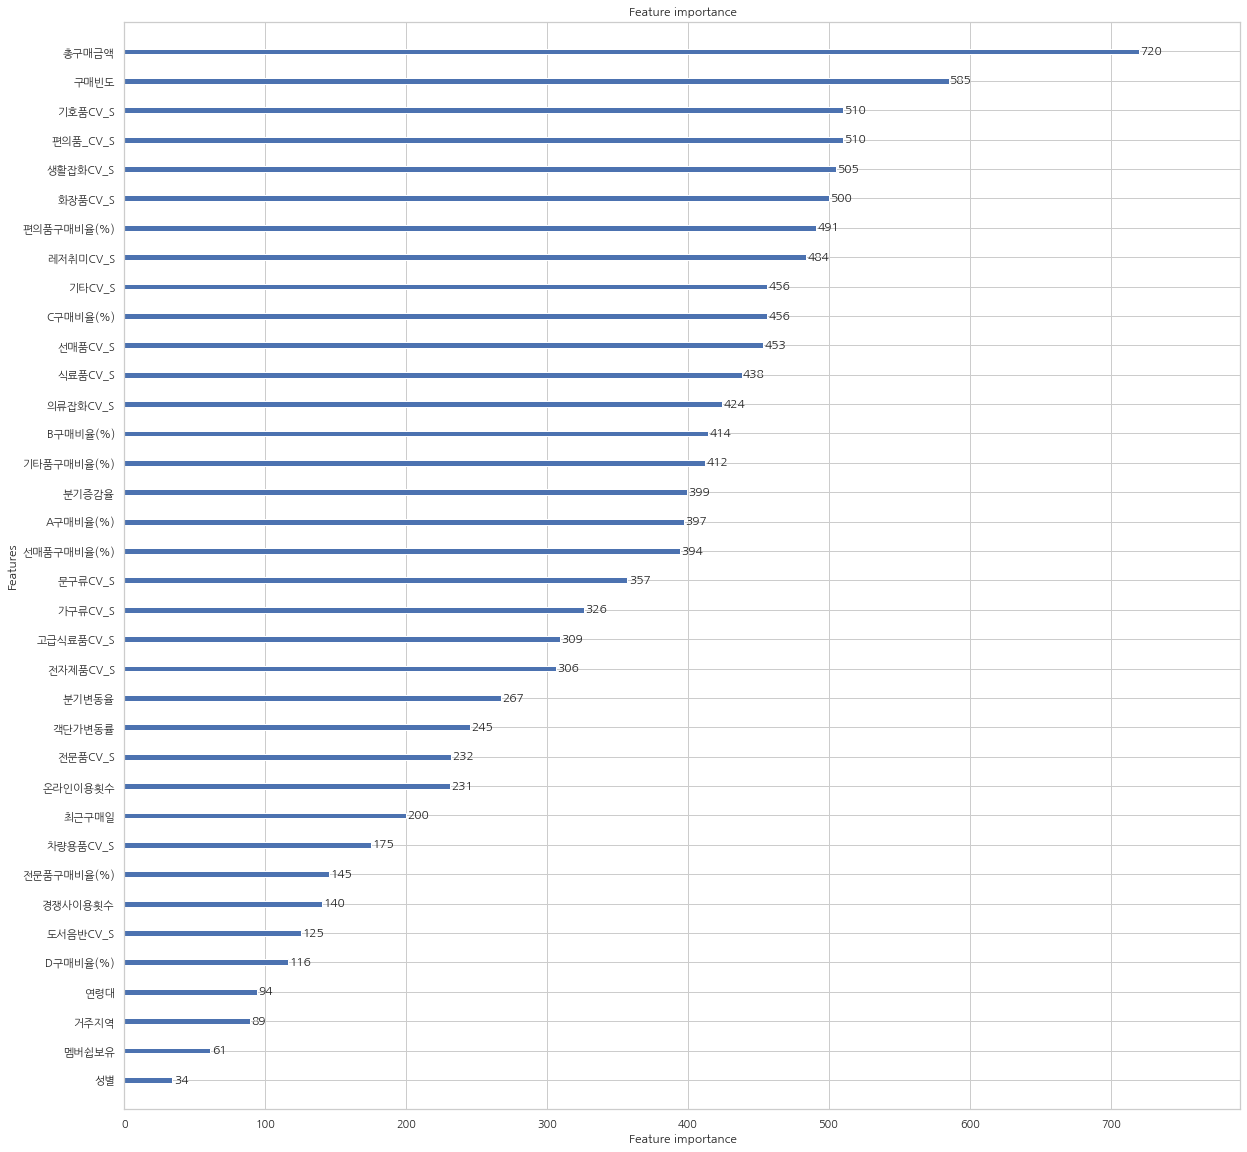

In [61]:
from lightgbm import plot_importance
fig, ax = plt.subplots(figsize=(20,20))
plot_importance(lgbm,ax=ax)

In [89]:
import eli5 
from eli5.sklearn import PermutationImportance 
from sklearn.ensemble import RandomForestClassifier

#미리 사용할 알고리즘을 fit 해야한다
model =  LGBMClassifier(n_estimators=400).fit(X_train, y_train)
perm = PermutationImportance(model, scoring = "accuracy", random_state = 22).fit(X_train, y_train) 
eli5.show_weights(perm, top = 20, feature_names = X_train.columns.tolist())

Weight,Feature
0.2950 ± 0.0069,분기증감율
0.0702 ± 0.0040,총구매금액
0.0553 ± 0.0017,구매빈도
0.0419 ± 0.0016,편의품구매비율(%)
0.0270 ± 0.0023,C구매비율(%)
0.0255 ± 0.0021,식료품CV_S
0.0239 ± 0.0017,B구매비율(%)
0.0238 ± 0.0018,기타CV_S
0.0226 ± 0.0012,기타품구매비율(%)
0.0218 ± 0.0012,편의품_CV_S


In [59]:
print('LGBM 정확도: {0:.4f}'.format(accuracy),'\n')
print('최적 하이퍼 파라미터:\n', gridcv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(gridcv.best_score_))

LGBM 정확도: 0.7289 

최적 하이퍼 파라미터:
 {'max_depth': 128, 'min_child_samples': 60, 'subsample': 0.8}
최고 예측 정확도: 0.7416


# 로지스틱 회귀

In [67]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_preds = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
accuracy = accuracy_score(y_test,lr_preds)
roc_auc = roc_auc_score(y_test,pred_proba)
print(f'accuracy: {accuracy:.4f}')
# print(f'roc_auc: {roc_auc:.4f}','\n')


params = {'penalty':['l2','l1'],
         'C':[0.01,0.1,1,5,10]}

grid_clf = GridSearchCV(lr_clf,param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(X_train, y_train)
print(f'최적 하이퍼 파라미터 : {grid_clf.best_params_}')
print(f'최적 평균 정확도 : {grid_clf.best_score_: .4f}')


accuracy: 0.7247
최적 하이퍼 파라미터 : {'C': 1, 'penalty': 'l2'}
최적 평균 정확도 :  0.7349


In [ ]:
    # lgbm
    lgbm = LGBMClassifier(n_estimators=400,max_depth: 128, min_child_samples: 60, subsample: 0.8)
    evals = [(X_test,y_test)]
    lgbm.fit(x, y, eval_set=evals, verbose=False)

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
 
def clf(x, y):
    # random forest
    rfc = RandomForestClassifier(max_depth=12, random_state=99, criterion = "entropy",n_estimators = 100, max_features='auto')
#     rfc = RandomForestClassifier(max_depth: 10, min_samples_leaf: 8, min_samples_split: 20, n_estimators: 100,random_state=99)
    rfc.fit(x, y)
    result_rfc = permutation_importance(rfc, x,y , n_repeats=10, random_state=333, n_jobs=2)
    sorted_idx_rfc = result_rfc.importances_mean.argsort()
    importances_rf = pd.DataFrame(result_rfc.importances_mean[sorted_idx_rfc], index=x.columns[sorted_idx_rfc]).sort_values(0, ascending=False).iloc[:45]

    # xg boosting
    xg = XGBClassifier(booster='gbtree', max_depth=7,  gamma=0.5, learning_rate=0.01, n_estimators=3, random_state=99)
#     xg = XGBClassifier(n_estimators=100,colsample_bytree: 0.75, max_depth: 5, min_child_weight: 3, random_state=99)
    xg.fit(x, y)
    result_xg = permutation_importance(xg, x,y , n_repeats=10, random_state=333, n_jobs=2)
    sorted_idx_xg = result_xg.importances_mean.argsort()
    importances_xg = pd.DataFrame(result_xg.importances_mean[sorted_idx_xg], index=x.columns[sorted_idx_xg]).sort_values(0, ascending=False).iloc[:45]      

    
 # gradient boosting
    gb = GradientBoostingClassifier(criterion='friedman_mse',loss='deviance', max_depth=5, n_estimators=30, random_state=99, max_features='auto')
    gb.fit(x, y)
    result_gb = permutation_importance(gb, x,y , n_repeats=10, random_state=333, n_jobs=2)
    sorted_idx_gb = result_gb.importances_mean.argsort()
    importances_gb = pd.DataFrame(result_gb.importances_mean[sorted_idx_gb], index=x.columns[sorted_idx_gb]).sort_values(0, ascending=False).iloc[:45]
    

    return importances_rf, importances_gb,importances_xg


In [57]:
importances_rf,importances_gb,importances_xg = clf(X_train,y_train)

[16:41:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [62]:
display(importances_rf)
display(importances_gb)
display(importances_xg)

,0
분기증감율,0.270428
총구매금액,0.055029
편의품_CV_S,0.053081
구매빈도,0.043573
편의품구매비율(%),0.032554
식료품CV_S,0.032242
생활잡화CV_S,0.031116
기호품CV_S,0.025113
의류잡화CV_S,0.023754
선매품CV_S,0.020203


,0
분기증감율,0.216671
구매빈도,0.015830
총구매금액,0.015372
편의품구매비율(%),0.006957
편의품_CV_S,0.004446
생활잡화CV_S,0.004088
식료품CV_S,0.003790
온라인이용횟수,0.002385
기타품구매비율(%),0.002326
분기변동율,0.002173


,0
분기증감율,0.214723
총구매금액,0.029777
구매빈도,0.023867
편의품_CV_S,0.012967
편의품구매비율(%),0.008276
고급식료품CV_S,0.005493
식료품CV_S,0.005453
화장품CV_S,0.005241
기타품구매비율(%),0.005095
온라인이용횟수,0.004632


In [47]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

def graph_import(df):
    sns.set(font="NanumGothic",
            rc={"axes.unicode_minus":False},
            style='whitegrid')
    df=df.sort_values(0) 
    ax = df.plot(kind='barh', title='Permutation Importances (test set)', figsize=(12, 4), legend=True, fontsize=12)
    ax.set_xlabel('Importances', fontsize=12)          # x축 정보 표시
    ax.set_ylabel('columns', fontsize=12)     # y축 정보 표시


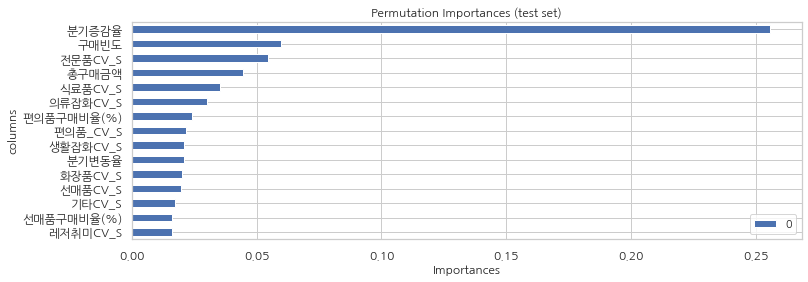

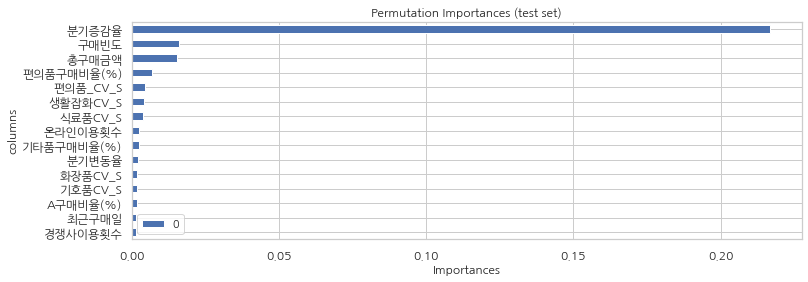

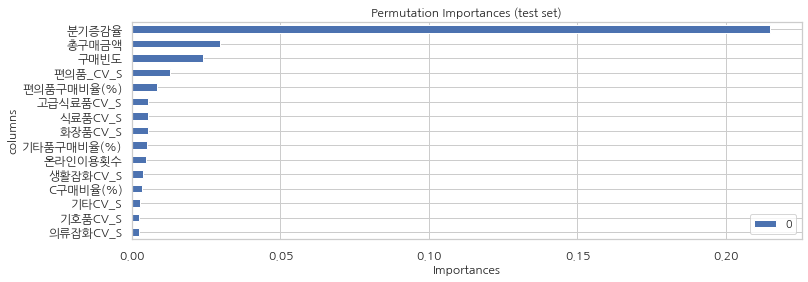

In [48]:
graph_import(importances_rf[:15])
graph_import(importances_gb[:15])
graph_import(importances_xg[:15])